In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.impute import SimpleImputer

In [39]:
df=pd.read_csv('Company_Data.csv')

In [70]:
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales_new
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,high
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,high
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,high
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,low
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,low
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes,high
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes,low
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes,low
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes,low


In [100]:
sales_new=[]
for value in df['Sales']:
    if value<=7.41:
        sales_new.append('low')
    else:
        sales_new.append('high')
print(sales_new)
df['sales_new']=sales_new
    

['high', 'high', 'high', 'low', 'low', 'high', 'low', 'high', 'low', 'low', 'high', 'high', 'low', 'high', 'high', 'high', 'high', 'high', 'high', 'high', 'low', 'high', 'low', 'low', 'high', 'high', 'high', 'low', 'low', 'high', 'high', 'high', 'low', 'high', 'low', 'high', 'high', 'low', 'low', 'low', 'low', 'high', 'high', 'low', 'low', 'low', 'high', 'low', 'low', 'high', 'low', 'low', 'high', 'low', 'low', 'low', 'high', 'low', 'low', 'low', 'high', 'low', 'low', 'high', 'high', 'low', 'high', 'high', 'high', 'high', 'high', 'low', 'low', 'high', 'low', 'high', 'high', 'high', 'low', 'high', 'high', 'high', 'high', 'low', 'low', 'high', 'high', 'high', 'low', 'high', 'low', 'low', 'low', 'high', 'high', 'low', 'high', 'high', 'high', 'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low', 'high', 'low', 'high', 'high', 'low', 'low', 'low', 'high', 'high', 'low', 'high', 'high', 'low', 'low', 'high', 'low', 'high', 'high', 'high', 'high', 'low', 'low', 'low', 'high', 'low', 'high',

In [101]:
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales_new
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,high
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,high
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,high
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,low
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,low
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes,high
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes,low
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes,low
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes,low


In [102]:
df.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
sales_new      0
dtype: int64

In [103]:
df.duplicated().any()

False

In [138]:
target=df[['sales_new']]

In [139]:
target

,sales_new
0,high
1,high
2,high
3,low
4,low
...,...
395,high
396,low
397,low
398,low


In [158]:
features=df.drop(['sales_new','Sales'],axis=1)

In [159]:
features

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,Bad,42,17,Yes,Yes
1,111,48,16,260,83,Good,65,10,Yes,Yes
2,113,35,10,269,80,Medium,59,12,Yes,Yes
3,117,100,4,466,97,Medium,55,14,Yes,Yes
4,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,Good,33,14,Yes,Yes
396,139,23,3,37,120,Medium,55,11,No,Yes
397,162,26,12,368,159,Medium,40,18,Yes,Yes
398,100,79,7,284,95,Bad,50,12,Yes,Yes


In [160]:
features=pd.get_dummies(features)
features

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,138,73,11,276,120,42,17,1,0,0,0,1,0,1
1,111,48,16,260,83,65,10,0,1,0,0,1,0,1
2,113,35,10,269,80,59,12,0,0,1,0,1,0,1
3,117,100,4,466,97,55,14,0,0,1,0,1,0,1
4,141,64,3,340,128,38,13,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,33,14,0,1,0,0,1,0,1
396,139,23,3,37,120,55,11,0,0,1,1,0,0,1
397,162,26,12,368,159,40,18,0,0,1,0,1,0,1
398,100,79,7,284,95,50,12,1,0,0,0,1,0,1


In [161]:
x_train,x_test,y_train,y_test=train_test_split(features,target,train_size=0.75,random_state=100)

In [162]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(300, 14)
(100, 14)
(300, 1)
(100, 1)


In [163]:
dec_tree=DecisionTreeClassifier(criterion='gini',splitter='best',max_depth=8)

In [164]:
dec_tree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=8)

In [165]:
y_pred=dec_tree.predict(x_test)

In [166]:
accuracy_score(y_test,y_pred)

0.79

In [168]:
params={'criterion':['gini','entropy'],'splitter':['best','random'],'max_depth':[1,2,3,4,5,6,7,8,9,10]}

In [169]:
grid_search=GridSearchCV(dec_tree,params)

In [170]:
grid_search.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(max_depth=8),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'splitter': ['best', 'random']})

In [171]:
grid_search.best_params_

{'criterion': 'gini', 'max_depth': 10, 'splitter': 'random'}

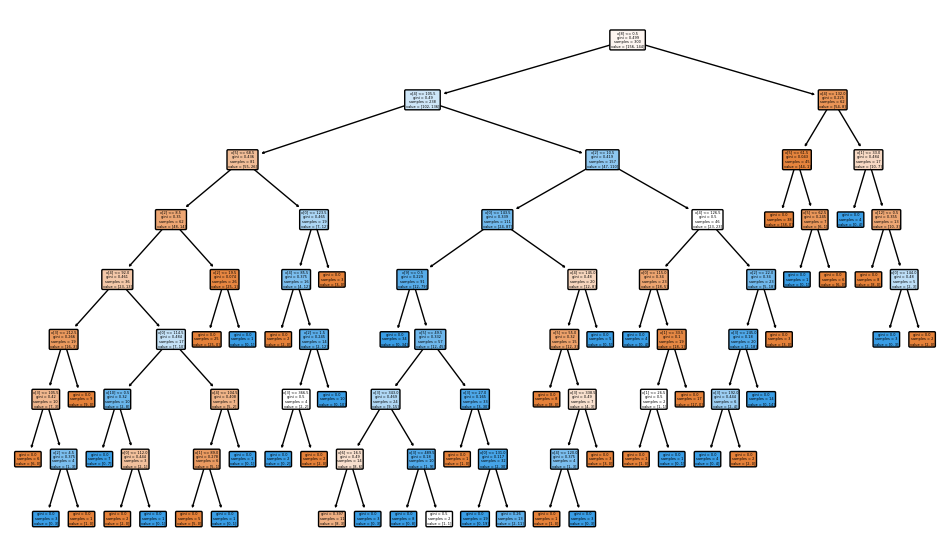

In [172]:
plt.figure(figsize=(12,7))
plot_tree(dec_tree,filled=True,rounded=True,feature_names=df.get(features));

In [190]:
df1=pd.read_csv('Fraud_check.csv')
df1

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [191]:
tax_income=[]
for value in df1['Taxable.Income']:
    if value<=30000:
        tax_income.append('Risk')
    else:
        tax_income.append('Good')
print(tax_income)
df1['tax_income']=tax_income
df1

['Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Risk', 'Good', 'Risk', 'Good', 'Good', 'Good', 'Risk', 'Good', 'Good', 'Risk', 'Good', 'Risk', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Risk', 'Good', 'Good', 'Good', 'Good', 'Good', 'Risk', 'Good', 'Risk', 'Good', 'Risk', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Risk', 'Good', 'Good', 'Good', 'Good', 'Risk', 'Good', 'Risk', 'Good', 'Good', 'Risk', 'Good', 'Good', 'Risk', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Risk', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Risk', 'Good', 'Good', 'Good', 'Good', 'Good', 'Risk', 'Good', 'Risk', 'Good', 'Risk', 'Good', 'Good', 'Good', 'Risk', 'Risk', 'Good', 'Risk', 'Good', 'Risk', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Risk', 'Good', 'Good', 'Good', 'Risk', 'Good', 'Good', 'Good', 'Risk', 'Good', 'Good', 'Good', 'Risk', 'Good', 'Good', 'Risk', 'Risk', 'Risk', 'Good',

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,tax_income
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good
...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,Good
596,YES,Divorced,69967,55369,2,YES,Good
597,NO,Divorced,47334,154058,0,YES,Good
598,YES,Married,98592,180083,17,NO,Good


In [192]:
df1.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
tax_income         0
dtype: int64

In [193]:
df1.duplicated().any()

False

In [194]:
target=df1[['tax_income']]
target

,tax_income
0,Good
1,Good
2,Good
3,Good
4,Good
...,...
595,Good
596,Good
597,Good
598,Good


In [195]:
features=df1.drop(['tax_income','Taxable.Income'],axis=1)
features

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,NO,Single,50047,10,YES
1,YES,Divorced,134075,18,YES
2,NO,Married,160205,30,YES
3,YES,Single,193264,15,YES
4,NO,Married,27533,28,NO
...,...,...,...,...,...
595,YES,Divorced,39492,7,YES
596,YES,Divorced,55369,2,YES
597,NO,Divorced,154058,0,YES
598,YES,Married,180083,17,NO


In [203]:
features=pd.get_dummies(features)
features

,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
0,50047,10,1,0,0,0,1,0,1
1,134075,18,0,1,1,0,0,0,1
2,160205,30,1,0,0,1,0,0,1
3,193264,15,0,1,0,0,1,0,1
4,27533,28,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...
595,39492,7,0,1,1,0,0,0,1
596,55369,2,0,1,1,0,0,0,1
597,154058,0,1,0,1,0,0,0,1
598,180083,17,0,1,0,1,0,1,0


In [204]:
x_train,x_test,y_train,y_test=train_test_split(features,target,train_size=0.7,random_state=100)

In [205]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(420, 9)
(180, 9)
(420, 1)
(180, 1)


In [217]:
dec_tree1=DecisionTreeClassifier(criterion='gini',splitter='best',max_depth=4)

In [218]:
dec_tree1=dec_tree1.fit(x_train,y_train)
dec_tree1

DecisionTreeClassifier(max_depth=4)

In [219]:
y_pred=dec_tree1.predict(x_test)

In [220]:
accuracy_score(y_test,y_pred)

0.7833333333333333

[Text(0.5, 0.9, 'x[0] <= 63521.0\ngini = 0.328\nsamples = 420\nvalue = [333, 87]\nclass = risky'),
 Text(0.28846153846153844, 0.7, 'x[0] <= 36488.5\ngini = 0.209\nsamples = 101\nvalue = [89, 12]\nclass = risky'),
 Text(0.15384615384615385, 0.5, 'x[0] <= 35917.5\ngini = 0.342\nsamples = 32\nvalue = [25, 7]\nclass = risky'),
 Text(0.07692307692307693, 0.3, 'x[0] <= 32134.5\ngini = 0.285\nsamples = 29\nvalue = [24, 5]\nclass = risky'),
 Text(0.038461538461538464, 0.1, 'gini = 0.188\nsamples = 19\nvalue = [17, 2]\nclass = risky'),
 Text(0.11538461538461539, 0.1, 'gini = 0.42\nsamples = 10\nvalue = [7, 3]\nclass = risky'),
 Text(0.23076923076923078, 0.3, 'x[6] <= 0.5\ngini = 0.444\nsamples = 3\nvalue = [1, 2]\nclass = Good'),
 Text(0.19230769230769232, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]\nclass = Good'),
 Text(0.2692307692307692, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = risky'),
 Text(0.4230769230769231, 0.5, 'x[6] <= 0.5\ngini = 0.134\nsamples = 69\nvalue = [64, 5]\

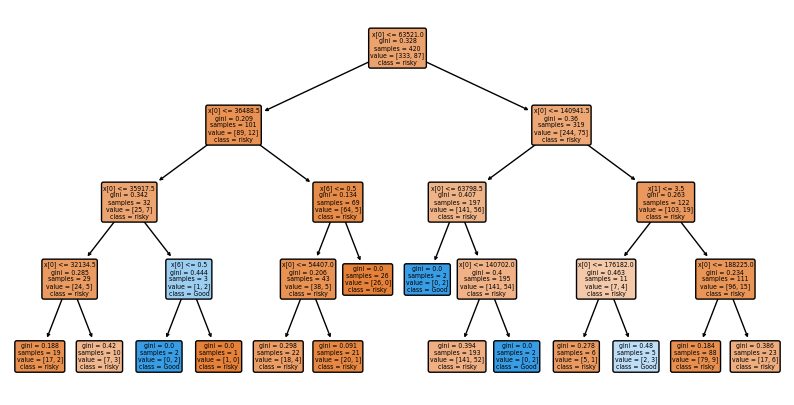

In [235]:
plt.figure(figsize=(10,5))
plot_tree(dec_tree1,filled=True,rounded=True,feature_names= df1.get([['Undergrad','Marital.Status','City.Population','Work.Experience']]),class_names=['risky','Good'])